In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
abnormal = pd.read_csv('abnormal.csv')
abnormal = abnormal.drop(['Unnamed: 0'], axis = 1)
abnormal['label'] = 0

In [3]:
X_normalized = preprocessing.normalize(abnormal, norm='l2')

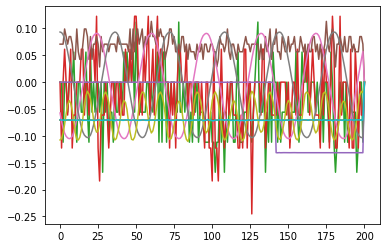

In [4]:
plt.plot(X_normalized[10:20].T)
plt.show()

In [5]:
normal = pd.read_csv('normal.csv')
normal = normal.drop(['Unnamed: 0'], axis = 1)

In [6]:
X = preprocessing.normalize(normal, norm='l2')

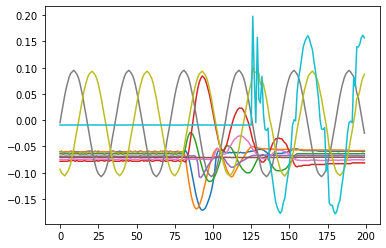

In [7]:
plt.plot(X[20:30].T)
plt.show()

In [8]:
normal['label'] = 1

In [9]:
data = [abnormal, normal]
data = pd.concat(data)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
y = data['label']
x = data.drop(['label'], axis = 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:
import keras

Using TensorFlow backend.


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [32]:
num_labels = y.shape[0]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(200,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('softmax'))

In [39]:
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               51456     
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
__________

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy)

Pre-training accuracy: 10.7579%


In [47]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Instructions for updating:
Use tf.cast instead.
Train on 1632 samples, validate on 409 samples
Epoch 1/100
1632/1632 [==============================] - 2s 1ms/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 2/100
1632/1632 [==============================] - 1s 312us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 3/100
1632/1632 [==============================] - 0s 298us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 4/100
1632/1632 [==============================] - 1s 326us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 5/100
1632/1632 [==============================] - 1s 360us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 6/100
1632/1632 [==============================] - 1s 311us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 7/100
1632/1632 [==============================] - 1s 318us/step - 

1632/1632 [==============================] - 1s 358us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 58/100
1632/1632 [==============================] - 1s 324us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 59/100
1632/1632 [==============================] - 1s 323us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 60/100
1632/1632 [==============================] - 1s 317us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 61/100
1632/1632 [==============================] - 1s 349us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 62/100
1632/1632 [==============================] - 1s 326us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 63/100
1632/1632 [==============================] - 1s 325us/step - loss: 14.5064 - acc: 0.0901 - val_loss: 14.2273 - val_acc: 0.1076
Epoch 64/100
1632/1632 [=========

In [48]:

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.0900735294117647
Testing Accuracy:  0.10757946204803975
